Step1:Load Dataset

In [13]:
import pandas as pd  

pre_health_data = pd.read_excel("../Data/Medibuddy_BMI.xlsx")
personal_data = pd.read_excel("../Data/Medibuddy_Region.xlsx")  
BMI =pd.DataFrame(pre_health_data) 
personal_data = pd.DataFrame(personal_data)
print(BMI.head()) 
print(personal_data.head())

  Policy no.  age     sex     bmi  charges in INR
0  PLC156898   19  female  27.900     16884.92400
1  PLC156907   18    male  33.770      1725.55230
2  PLC156916   28    male  33.000      4449.46200
3  PLC156925   33    male  22.705     21984.47061
4  PLC156934   32    male  28.880      3866.85520
  Policy no.  children smoker     region
0  PLC157006         0     no  southwest
1  PLC157033         1     no  southwest
2  PLC157060         0     no  southwest
3  PLC157087         1     no  southwest
4  PLC157186         5     no  southwest


In [14]:
print(pre_health_data.isnull().sum()) 
print(personal_data.isnull().sum())

Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64
Policy no.    0
children      0
smoker        0
region        0
dtype: int64


In [15]:
print(pre_health_data.info()) 
print(personal_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 52.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Policy no.  1338 non-null   object
 1   children    1338 non-null   int64 
 2   smoker      1338 non-null   object
 3   region      1338 non-null   object
dtypes: int64(1), object(3)
memory usage: 41.9+ KB
None


Step2:Merge Datasets

In [16]:
data = pd.merge(pre_health_data, personal_data, on="Policy no.") 
print("Merged data Info:")
print(data.info())
print(data.head())

Merged data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
 5   children        1338 non-null   int64  
 6   smoker          1338 non-null   object 
 7   region          1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB
None
  Policy no.  age     sex     bmi  charges in INR  children smoker     region
0  PLC156898   19  female  27.900     16884.92400         0    yes  southwest
1  PLC156907   18    male  33.770      1725.55230         1     no  southeast
2  PLC156916   28    male  33.000      4449.46200         3     no  southeast
3  PLC156925   33    male  22.705     21984.47

Step 3: Data Cleaning and Feature Engineering

In [19]:
import numpy as np
#handling missing values 
data = data.dropna() 

#Feature Engineering: BMI Categories 
data["BMI_Category"] = pd.cut(data['bmi'],bins=[0,18.5,24.9,29.9, np.inf], labels=["Underweight", "Normal", "Overweight", "Obese"]) 

#Convert 'Smoker' column to binary 
data['smoker'] = data['smoker'].map({"yes":1, "no":0}) 
print(data.head())

  Policy no.  age     sex     bmi  charges in INR  children  smoker  \
0  PLC156898   19  female  27.900     16884.92400         0       1   
1  PLC156907   18    male  33.770      1725.55230         1       0   
2  PLC156916   28    male  33.000      4449.46200         3       0   
3  PLC156925   33    male  22.705     21984.47061         0       0   
4  PLC156934   32    male  28.880      3866.85520         0       0   

      region BMI_Category  
0  southwest   Overweight  
1  southeast        Obese  
2  southeast        Obese  
3  northwest       Normal  
4  northwest   Overweight  


Step 5: Exploratory Data Analysis(EDA)

Gender Constraint Analysics


Average Policy Amount by Gender:
sex
female    12569.578844
male      13956.751178
Name: charges in INR, dtype: float64


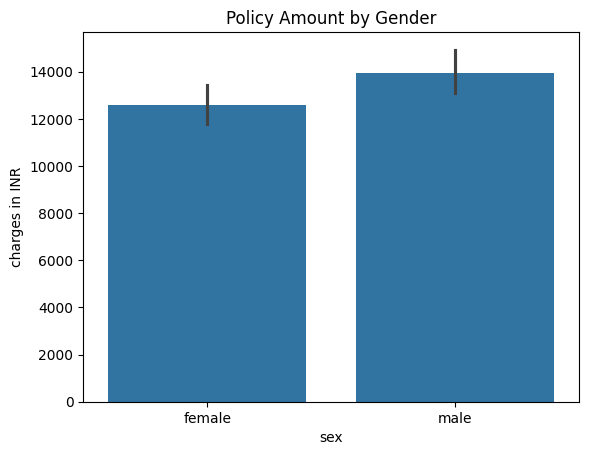

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt
#average policy amount by gender 
avg_by_gender = data.groupby('sex')['charges in INR'].mean() 
print("Average Policy Amount by Gender:")
print(avg_by_gender)

#Visualization 
sns.barplot(x='sex', y='charges in INR', data=data) 
plt.title("Policy Amount by Gender") 
plt.show()

Average Money Spent on Policies

In [24]:
average_policy_amount = data['charges in INR'].mean() 
print(f"Average Policy Amount: {average_policy_amount:.2f}")

Average Policy Amount: 13270.42


Geographic Location Analysics

Average Policy Amount by Location:13270.42


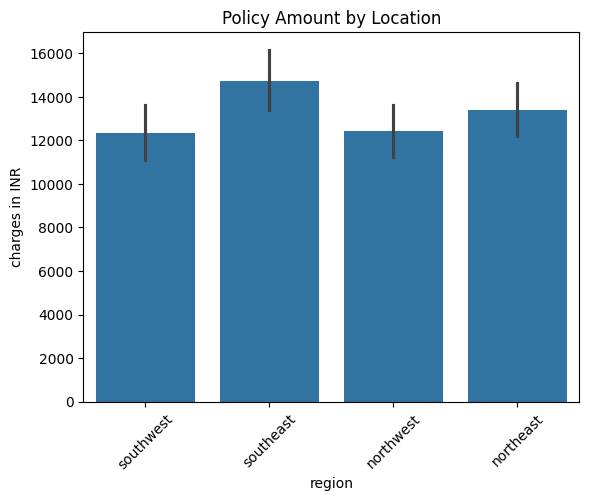

In [26]:
avg_by_location = data.groupby('region')['charges in INR'].mean() 
print(f"Average Policy Amount by Location:{average_policy_amount:.2f}") 

sns.barplot(x='region',y='charges in INR', data=data) 
plt.title("Policy Amount by Location") 
plt.xticks(rotation=45)
plt.show()

Number of Dependents Analysics

Average Claimed Amount by Number of Children:
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges in INR, dtype: float64


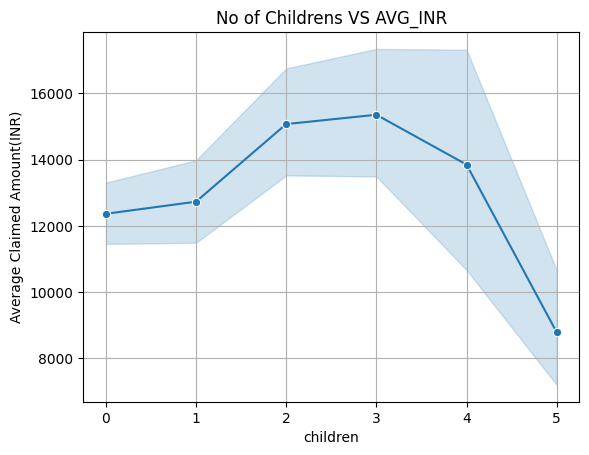

In [36]:
avg_by_children = data.groupby('children')['charges in INR'].mean() 
print("Average Claimed Amount by Number of Children:") 
print(avg_by_children) 

sns.lineplot(x='children',y='charges in INR',data=data, marker='o') 
plt.title("No of Childrens VS AVG_INR") 
plt.ylabel("Average Claimed Amount(INR)") 
plt.grid(True) 
plt.show()

BMI and Policy Amount

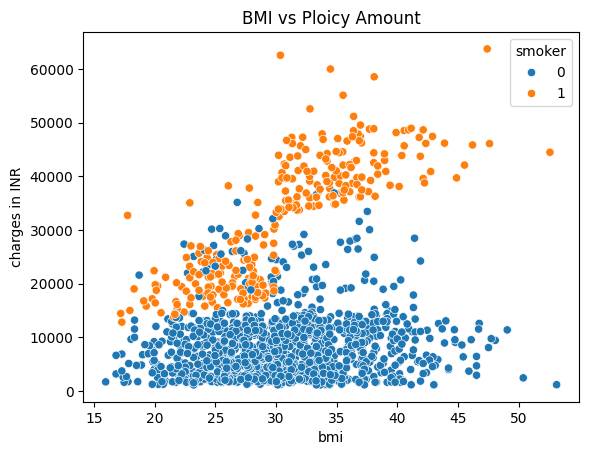

In [28]:
sns.scatterplot(x='bmi',y='charges in INR', hue='smoker', data=data) 
plt.title('BMI vs Ploicy Amount') 
plt.show()

Smoking Status

In [30]:
avg_by_smoker = data.groupby('smoker')['charges in INR'].mean() 
print(f"Avergae Policy Amount by Smoking status:{avg_by_smoker}") 


Avergae Policy Amount by Smoking status:smoker
0     8434.268298
1    32050.231832
Name: charges in INR, dtype: float64


Age and Policy

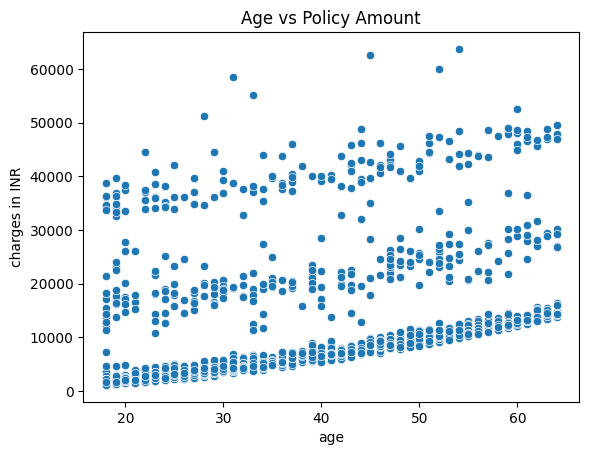

In [34]:
sns.scatterplot(x='age', y='charges in INR', data=data) 
plt.title("Age vs Policy Amount") 
plt.show()